# Task #2 Prediction using Unsupervised ML
## Author : Vivek Sharma
### Problem Statement: 
#### * From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading Data

In [2]:
dataset=pd.read_csv(r'C:\Users\VIVEK\Downloads\Iris.csv')
X=dataset.iloc[:,1:5].values
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Exploration

### Structure of Data

In [3]:
dataset.shape

(150, 6)

### Detailed View of Data

In [4]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# K-Means Clustering
### Finding the Number of Clusters

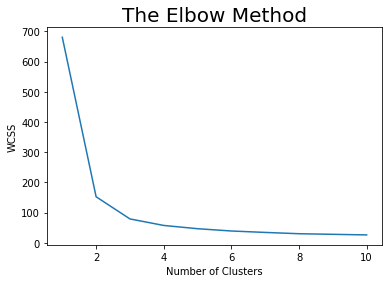

In [5]:
# Importing Library
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting Elbow Curve
plt.plot(range(1,11),wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("The Elbow Method",fontsize=20)
plt.rcParams['figure.figsize']=(10,5)
plt.show()

> * Number of Clusters : 3

### Making Predictions

In [6]:
kmeans=KMeans(n_clusters=3, init="k-means++", random_state=0)
y_kmeans=kmeans.fit_predict(X)

In [7]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Plotting Clusters 

In [8]:
# Cluster Center values
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

## Clustering wrt Sepal Length & Sepal Width

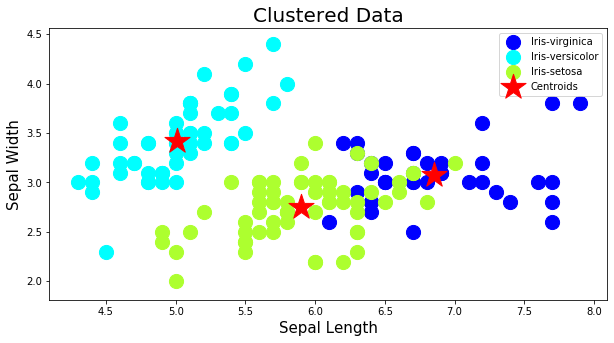

In [9]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=200,c='blue',label='Iris-virginica')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=200,c='aqua',label='Iris-versicolor')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=200,c='greenyellow',label='Iris-setosa')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=700 ,c='red',marker="*",label='Centroids')
plt.title("Clustered Data",fontsize=20)
plt.rcParams['figure.figsize']=(10,5)
plt.xlabel("Sepal Length",fontsize=15)
plt.ylabel("Sepal Width",fontsize=15)
plt.legend()
plt.show()

## Clustering wrt PetalLength & Petal Width

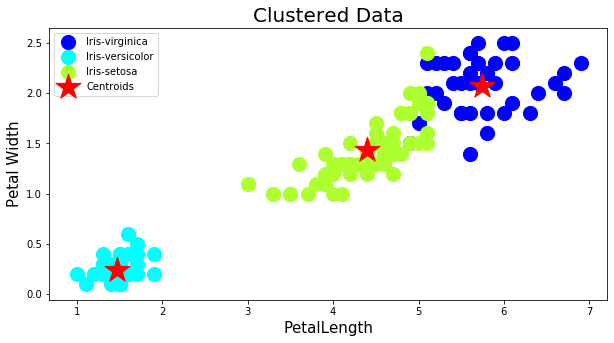

In [10]:
plt.scatter(X[y_kmeans==0,2],X[y_kmeans==0,3],s=200,c='blue',label='Iris-virginica')
plt.scatter(X[y_kmeans==1,2],X[y_kmeans==1,3],s=200,c='aqua',label='Iris-versicolor')
plt.scatter(X[y_kmeans==2,2],X[y_kmeans==2,3],s=200,c='greenyellow',label='Iris-setosa')
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s=700 ,c='red',marker="*",label='Centroids')
plt.title("Clustered Data",fontsize=20)
plt.rcParams['figure.figsize']=(10,5)
plt.xlabel("PetalLength",fontsize=15)
plt.ylabel("Petal Width",fontsize=15)
plt.legend()
plt.show()

# Thankyou